In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/jishnu/codespace/saras_codes/SARAS_INCLUDES_py/')
from EDGES_profile import *

In [2]:
freq = np.linspace(0.030,0.110,101)*1e3
cutoff_ch_low = 0
cutoff_ch_high = 100
freq = freq[cutoff_ch_low:cutoff_ch_high]

# PATH = "/Users/jishnu/Documents/SARAS3_RL_measurements/LAB_TESTS/RL_April_07_2019_at_VNA/RL_0dBm/"
# filename_open = PATH+"2019-04-07_074800.csv"
# filename_short = PATH+"2019-04-07_075926.csv"
# filename_load = PATH+"2019-04-07_081111.csv"

PATH = "/Users/jishnu/Documents/SARAS3_RL_measurements/LAB_TESTS/RL_April_07_2019_at_VNA/RL__4dBm/"
filename_open = PATH+"2019-04-07_074252.csv"
filename_short = PATH+"2019-04-07_075416.csv"
filename_load = PATH+"2019-04-07_080602.csv"

##########################################################################################

f = open(filename_open,'r')
j = 0
t_e_real = np.zeros(101)
t_e_imag = np.zeros(101)
for line in f:
    line = line.strip()
    line = line.split(',')
    if len(line)==203:
        line = line[1:]
        gamma_real = np.asarray(line[0::2],dtype=np.float64)
        gamma_imag = np.asarray(line[1::2],dtype=np.float64)
        t_e_real = t_e_real + gamma_real
        t_e_imag = t_e_imag + gamma_imag
        j = j+1

t_e_open_real=t_e_real/j
t_e_open_imag=t_e_imag/j
t_e_open_real = t_e_open_real[cutoff_ch_low:cutoff_ch_high]
t_e_open_imag = t_e_open_imag[cutoff_ch_low:cutoff_ch_high]
Gamma_open = t_e_open_real + (t_e_open_imag *1j)

##########################################################################################

f = open(filename_short,'r')
j = 0
t_e_real = np.zeros(101)
t_e_imag = np.zeros(101)
for line in f:
    line = line.strip()
    line = line.split(',')
    if len(line)==203:
        line = line[1:]
        gamma_real = np.asarray(line[0::2],dtype=np.float64)
        gamma_imag = np.asarray(line[1::2],dtype=np.float64)
        t_e_real = t_e_real + gamma_real
        t_e_imag = t_e_imag + gamma_imag
        j = j+1

t_e_short_real=t_e_real/j
t_e_short_imag=t_e_imag/j
t_e_short_real = t_e_short_real[cutoff_ch_low:cutoff_ch_high]
t_e_short_imag = t_e_short_imag[cutoff_ch_low:cutoff_ch_high]
Gamma_short = t_e_short_real + (t_e_short_imag *1j)

##########################################################################################

f = open(filename_load,'r')
j = 0
t_e_real = np.zeros(101)
t_e_imag = np.zeros(101)
for line in f:
    line = line.strip()
    line = line.split(',')
    if len(line)==203:
        line = line[1:]
        gamma_real = np.asarray(line[0::2],dtype=np.float64)
        gamma_imag = np.asarray(line[1::2],dtype=np.float64)
        t_e_real = t_e_real + gamma_real
        t_e_imag = t_e_imag + gamma_imag
        j = j+1

t_e_load_real=t_e_real/j
t_e_load_imag=t_e_imag/j
t_e_load_real = t_e_load_real[cutoff_ch_low:cutoff_ch_high]
t_e_load_imag = t_e_load_imag[cutoff_ch_low:cutoff_ch_high]
Gamma_load = t_e_load_real + (t_e_load_imag *1j)

f_low = 50
f_high = 100
low_index = int((f_low-np.min(freq))/(freq[1]-freq[0]))
high_index = int((f_high-np.min(freq))/(freq[1]-freq[0]))

freq = freq[low_index:high_index]
Gamma_open = Gamma_open[low_index:high_index]
Gamma_short = Gamma_short[low_index:high_index]
Gamma_load = Gamma_load[low_index:high_index]

In [3]:
ed = Gamma_load
ep = (Gamma_open+Gamma_short-2*Gamma_load)/(Gamma_open-Gamma_short)
et_a = (Gamma_open-Gamma_short-ep*(Gamma_open+Gamma_short))/2
et = et_a+(ep*ed)

EDGES_dip = EDGES_profile_78MHz(freq*1e6)

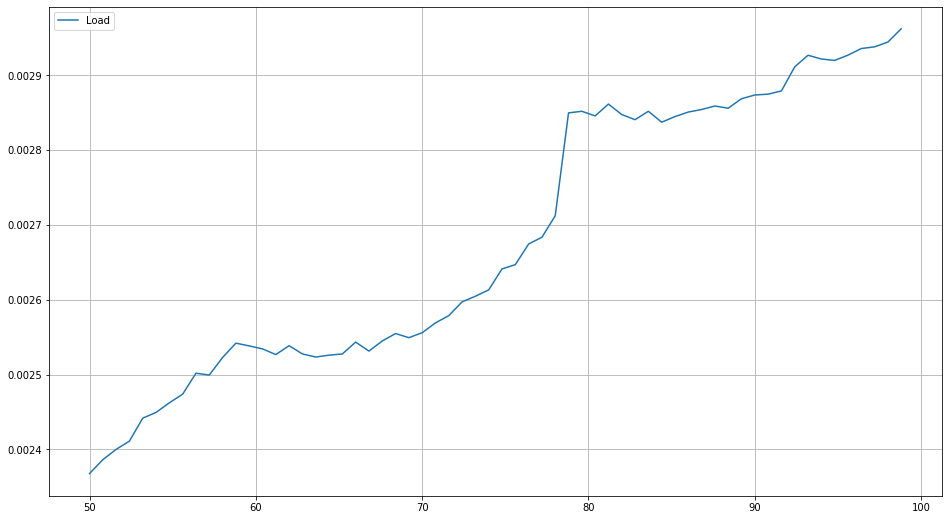

In [4]:
plt.figure(figsize=(16,9))
# plt.plot(freq, 20*np.log10(np.abs(Gamma_open)), label="Open")
# plt.plot(freq, 20*np.log10(np.abs(Gamma_short)), label="Short")
# plt.plot(freq, 20*np.log10(np.abs(Gamma_load)), label="Load")
plt.plot(freq, np.abs(Gamma_load), label="Load")
plt.legend()
# plt.xlim([min(freq), max(freq)])
plt.grid()

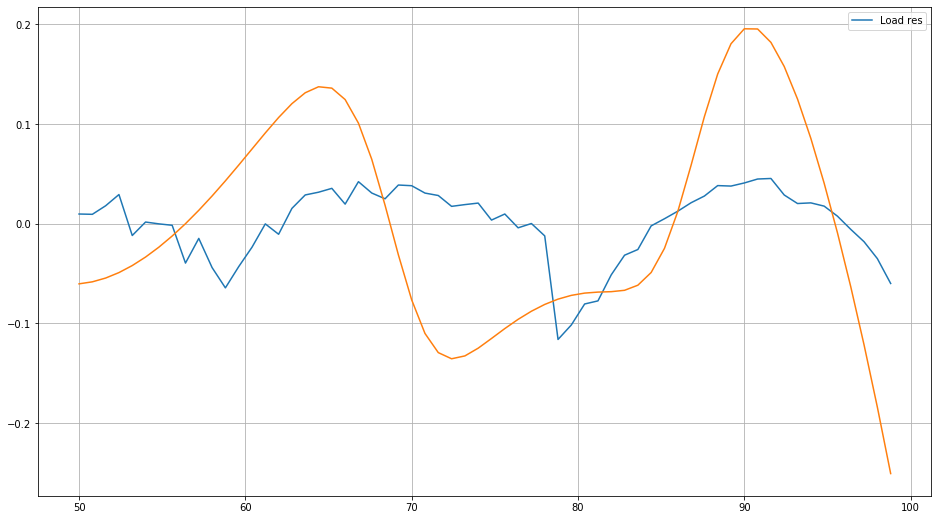

In [19]:
Sig = (-np.abs(Gamma_load))*(150*(freq/150)**-2.7)

Sig_pfit = np.polyfit(freq,Sig,3)
Sig_res = Sig-np.polyval(Sig_pfit,freq)

EDGES_pfit = np.polyfit(freq,EDGES_dip,3)
EDGES_res = EDGES_dip-np.polyval(EDGES_pfit,freq)

plt.figure(figsize=(16,9))
plt.plot(freq, Sig_res, label="Load res")
plt.plot(freq, EDGES_res)
plt.legend()
# plt.xlim([min(freq), max(freq)])
plt.grid()

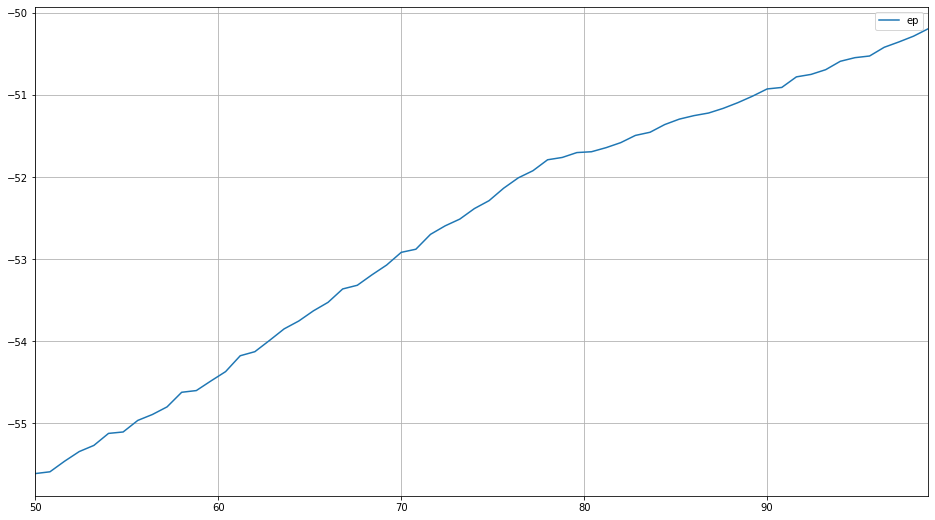

In [20]:
plt.figure(figsize=(16,9))
# plt.plot(freq, 20*np.log10(np.abs(et)), label="et")
plt.plot(freq, 20*np.log10(np.abs(ep)), label="ep")
# plt.plot(freq, 20*np.log10(np.abs(ed)), label="ed")
plt.legend()
plt.xlim([min(freq), max(freq)])
plt.grid()

In [7]:
# 20*np.log10(0.25)